In [11]:
data

{'LDA': {'c_v': 0.43908018125277165,
  'u_mass': -1.5880342664254556,
  'c_uci': -0.7236473971560676,
  'c_npmi': 0.011932256002458315,
  'c_w2v': 0.5820131897926331},
 'BERTopic': {'c_v': 0.5636527207907466,
  'u_mass': -1.9074749473409696,
  'c_uci': -0.9863742897180013,
  'c_npmi': 0.049418089586935915,
  'c_w2v': 0.6823185086250305},
 'Meta_Community': {'c_v': 0.46792092553162534,
  'u_mass': -10.540254422246292,
  'c_uci': -11.408181114604464,
  'c_npmi': -0.389791661499657,
  'c_w2v': 0.7258339524269104}}

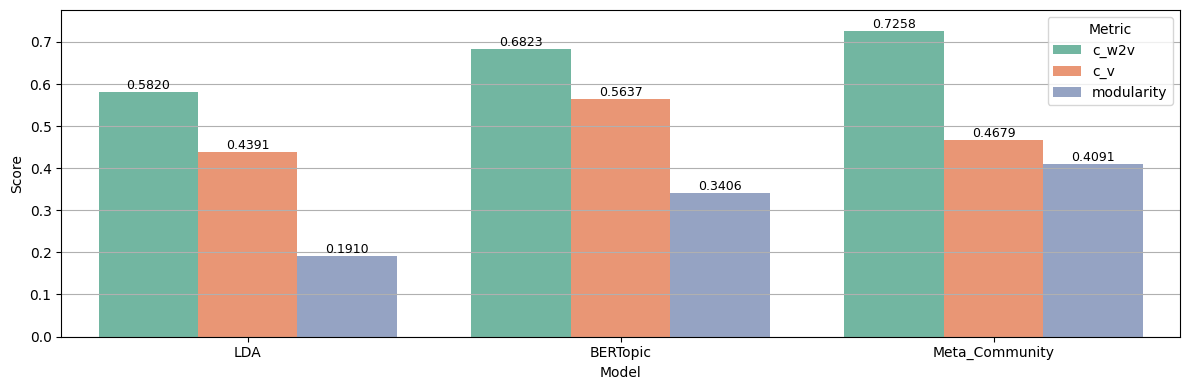

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 공통 파일 경로 정의
files = {
    "LDA": {
        "c_w2v": "/Users/kookbab/Desktop/연구 정리 KCI/코드/05. Metrics/coherence/LDA_coherence.json",
        "modularity": "/Users/kookbab/Desktop/연구 정리 KCI/코드/05. Metrics/modularities/LDA_modularity.json"
    },
    "BERTopic": {
        "c_w2v": "/Users/kookbab/Desktop/연구 정리 KCI/코드/05. Metrics/coherence/BERTopic_coherence.json",
        "modularity": "/Users/kookbab/Desktop/연구 정리 KCI/코드/05. Metrics/modularities/BERTopic_modularity.json"
    },
    "Meta_Community": {
        "c_w2v": "/Users/kookbab/Desktop/연구 정리 KCI/코드/05. Metrics/coherence/meta_community.json",
        "modularity": "/Users/kookbab/Desktop/연구 정리 KCI/코드/05. Metrics/modularities/meta_community.json"
    }
}

# 데이터 통합
data = {}
for model, paths in files.items():
    with open(paths["c_w2v"], 'r') as f1, open(paths["modularity"], 'r') as f2:
        coherence_data = json.load(f1)
        c_w2v = coherence_data.get("c_w2v", None)
        c_v = coherence_data.get("c_v", None)  # <- 새로 추가
        modularity = json.load(f2).get("modularity", None)
        data[model] = {
            "c_w2v": c_w2v,
            "c_v": c_v,
            "modularity": modularity
        }

# DataFrame 생성 및 Melt
df = pd.DataFrame(data).T.reset_index().rename(columns={'index': 'Model'})
df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# 시각화
plt.figure(figsize=(12, 4))
ax = sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='Set2')

# 수치 표시
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height):
        ax.annotate(f'{height:.4f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

# 축 및 제목 설정
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0, df_melted['Score'].max() + 0.05)
plt.grid(axis='y')
plt.legend(title="Metric")
plt.tight_layout()
plt.show()
